In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("loan-train.csv")

In [ ]:
data.head()

## Dataset Explanation

The dataset consists of information about loan applicants, including demographic details, financial information, and the outcome of their loan application. 
The dataset contains the following columns:

1. Loan_ID: Unique identifier for each loan application.
2. Gender: Gender of the applicant (Male/Female).
3. Married: Marital status of the applicant (Yes/No).
4. Dependents: Number of dependents of the applicant.
5. Education: Education level of the applicant (Graduate/Not Graduate).
6. Self_Employed: Whether the applicant is self-employed (Yes/No).
7. ApplicantIncome: Income of the applicant.
8. CoapplicantIncome: Income of the coapplicant.
9. LoanAmount: Loan amount requested.
10. Loan_Amount_Term: Duration of the loan in months.
11. Credit_History: Credit history of the applicant (1.0 for a positive history, 0.0 for negative).
12. Property_Area: Area where the property is located (Urban/Rural).
13. Loan_Status: Outcome of the loan application (Y for approved, N for rejected).


In [ ]:
data.info()

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Statistical Summary of the Numerical Columns

The following is a statistical summary of the numerical features in the dataset:

1. **ApplicantIncome**: 
   - The income of the applicant ranges from 150 to 81,000, with a mean of approximately 5403.46. The standard deviation is relatively high (6109.04), indicating some significant variability in the incomes of applicants.

2. **CoapplicantIncome**:
   - The income of the coapplicant ranges from 0 to 41,667, with a mean of approximately 1621.25. The high standard deviation (2926.25) indicates a wide spread in coapplicant incomes, with many applicants having no coapplicant income (as reflected by the minimum value of 0).

3. **LoanAmount**:
   - The loan amounts requested range from 9 to 700, with an average loan amount of 146.41. The standard deviation is 85.59, suggesting that there is considerable variation in the loan amounts requested.

4. **Loan_Amount_Term**:
   - The loan term ranges from 12 months to 480 months, with the majority of applicants opting for a 360-month term. The mean value is 342 months, reflecting the long-term nature of most loans.

5. **Credit_History**:
   - The credit history of applicants is either 0 or 1, where 1 represents a positive credit history, and 0 represents a negative credit history. Most applicants have a positive credit history, as indicated by the high mean of 0.842 and standard deviation of 0.365.

This summary provides an overview of the key numerical features, showing the general trends in income, loan amounts, and loan terms, as well as the credit history of applicants.


In [9]:
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins =True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


### Credit History vs Loan Status

The table above presents the distribution of applicants' credit history in relation to the loan status (approved or not) in the dataset:

#### Interpretation:

1. **Credit History = 0.0 (Negative Credit History)**:
   - Out of the 89 applicants with a negative credit history (0.0), 82 were not approved for a loan (N), while only 7 were approved (Y).
   - This indicates that applicants with a negative credit history have a significantly lower chance of getting their loan approved.

2. **Credit History = 1.0 (Positive Credit History)**:
   - Among the 475 applicants with a positive credit history (1.0), 97 were not approved for a loan (N), while 378 were approved (Y).
   - This suggests that applicants with a positive credit history have a much higher likelihood of having their loan application approved.

3. **Overall Distribution**:
   - There are a total of 564 applicants in the dataset, of which 179 were not approved for the loan (N) and 385 were approved (Y).
   - The data clearly shows a higher approval rate (Y) for applicants with a positive credit history compared to those with a negative credit history.

This table highlights the strong relationship between credit history and loan approval, where a positive credit history (1.0) significantly increases the likelihood of loan approval.

<Axes: >

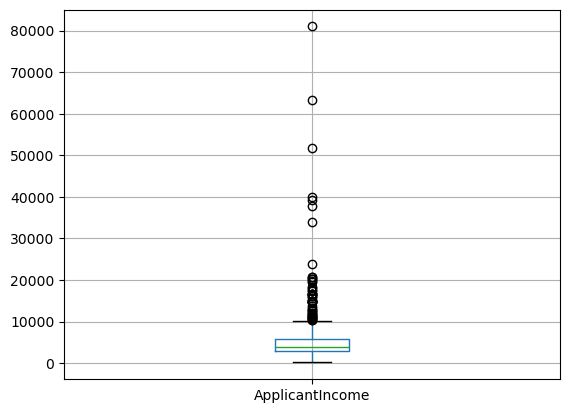

In [10]:
data.boxplot(column='ApplicantIncome')

<Axes: >

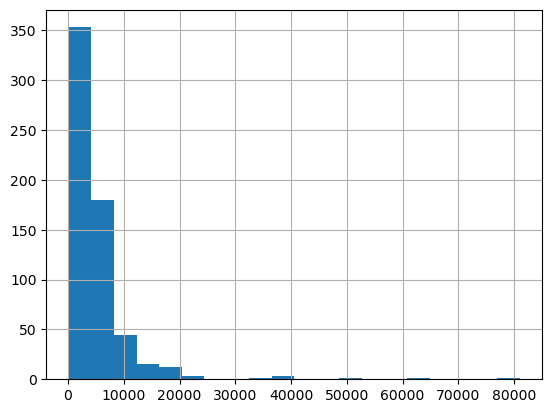

In [11]:
data['ApplicantIncome'].hist(bins=20)

**Description:** 
This histogram visualizes the distribution of the `ApplicantIncome` variable.
  - It divides the income values into 20 bins and counts the number of applicants in each range.
    Insights:
    - The distribution is right-skewed, indicating that most applicants have relatively low incomes, with a few high-income outliers.
    - This suggests the presence of a diverse applicant pool with varying income levels.

<Axes: >

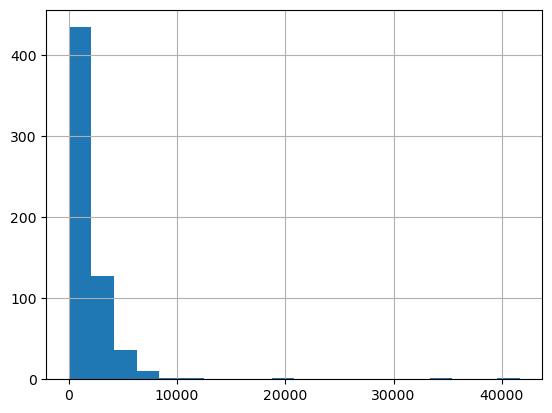

In [12]:
data['CoapplicantIncome'].hist(bins=20)

**Description:** 
  - This histogram visualizes the distribution of the `CoapplicantIncome` variable.
  - Like the applicant income histogram, it divides the coapplicant incomes into 20 bins.
  - Insights:
    - Many applicants have a coapplicant income of zero, as seen in the high frequency of the first bin.
    - For those with non-zero coapplicant incomes, the distribution appears to have a wider range but fewer extreme outliers compared to applicant income.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

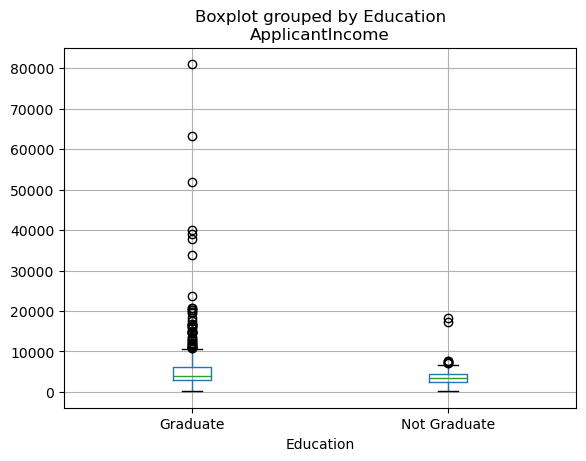

In [13]:
data.boxplot(column='ApplicantIncome', by= 'Education')

**Description:** 
  - This boxplot compares the distribution of `ApplicantIncome` based on the education level (`Graduate` vs. `Not Graduate`).
  - Insights:
    - Graduates tend to have higher median incomes than non-graduates.
    - The presence of outliers is more prominent among graduates, suggesting a subset of highly paid individuals.
    - The income range for both groups overlaps significantly, but education appears to have a modest influence on applicant income levels.

<Axes: >

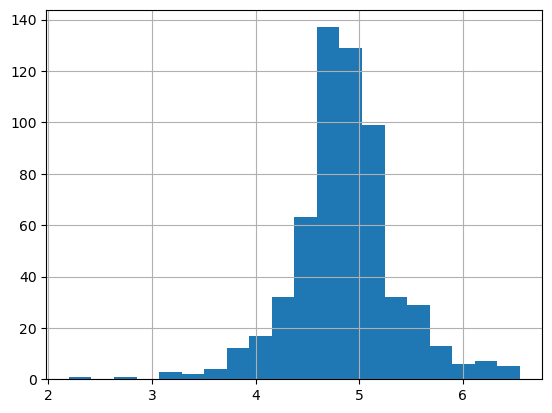

In [14]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

**Description:** 
  - This code applies a logarithmic transformation to the `LoanAmount` variable and stores the result in a new column, `LoanAmount_log`.
  - The logarithmic transformation is commonly used to reduce the effect of outliers and skewed data, especially when the data has a long tail (right-skewed distribution).
  - After the transformation, the values of the `LoanAmount_log` column represent the natural logarithm of the original loan amounts.

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [16]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

### Handling Missing Values in Categorical Columns

Missing values in the `Gender`, `Married`, `Dependents`, and `Self_Employed` columns are filled with their respective mode (most frequent value). Using the mode ensures consistency and aligns with the existing data distribution, making it an effective choice for categorical variables with minimal missing values. This process helps prepare the dataset for analysis by addressing null entries in a straightforward manner.


In [17]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['LoanAmount_log'] = data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean())

### Handling Missing Values in Loan Amount Columns

Missing values in the `LoanAmount` and `LoanAmount_log` columns are replaced with their respective mean values. This approach is suitable for numerical data, as it preserves the overall distribution and avoids introducing significant bias. Filling missing values ensures the dataset is complete and ready for further analysis or modeling.


In [18]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

### Handling Missing Values in Categorical Columns

Missing values in the `Loan_Amount_Term` and `Credit_History` columns are filled with their respective mode (most frequent value). Using the mode ensures consistency and aligns with the existing data distribution, making it an effective choice for categorical variables with minimal missing values. This process helps prepare the dataset for analysis by addressing null entries in a straightforward manner.


In [19]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [20]:
data['TotalIncome'] = data['ApplicantIncome']+ data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])

### Creating Total Income Features

1. **`TotalIncome`**: A new column is created by summing `ApplicantIncome` and `CoapplicantIncome` to represent the total income of the applicant and coapplicant combined.
2. **`TotalIncome_log`**: A logarithmic transformation of `TotalIncome` is applied to normalize the distribution and reduce the impact of outliers, making the data more suitable for analysis.

These features provide a comprehensive view of the applicants' financial capacity and help improve the performance of analytical models.


<Axes: >

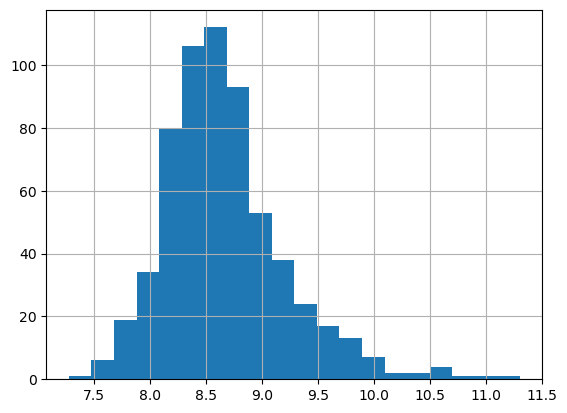

In [21]:
data['TotalIncome_log'].hist(bins=20)

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [23]:
X = data.iloc[:,np.r_[1:5,9:11,13:15]].values
y = data.iloc[:,12].values

### Splitting Features and Target Variable

1. **Features (`X`)**:
   - Extracted using `data.iloc[:, np.r_[1:5, 9:11, 13:15]]`.
   - This selects specific columns (by index ranges and positions) from the dataset:
     - Columns 1 to 4 (`Gender`, `Married`, `Dependents`, `Education`)
     - Columns 9 to 10 (`Loan_Amount_Term`, `Credit_History`)
     - Columns 13 to 14 (`TotalIncome`, `TotalIncome_log`)
   - These columns represent the independent variables used for model training.

2. **Target Variable (`y`)**:
   - Extracted using `data.iloc[:, 12]`.
   - This selects the 12th column (`Loan_Status`), which is the dependent variable or the target variable for the prediction task.

In [24]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [25]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [27]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [29]:
for i in range(0,5):
    X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])

The following code is used to apply `LabelEncoder` to the first five columns of `X_train`, transforming categorical variables into numerical values

In [30]:
X_train[:,7]=labelencoder_X.fit_transform(X_train[:,7])

In [31]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [32]:
labelencoder_y=LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [33]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [34]:
for i in range(0,5):
    X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])

In [35]:
X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [36]:
labelencoder_y=LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [40]:
from sklearn import metrics
print("The accuracy of the decision tree: ",metrics.accuracy_score(y_pred,y_test))

The accuracy of the decision tree:  0.7073170731707317


In [41]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [42]:
y_pred = NBClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [43]:
print("The accuracy of the Naive Bayes: ",metrics.accuracy_score(y_pred,y_test))

The accuracy of the Naive Bayes:  0.8292682926829268


In [44]:
testdata = pd.read_csv('loan-test.csv')

In [45]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [46]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [48]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [49]:
testdata['LoanAmount'] = testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean())

<Axes: >

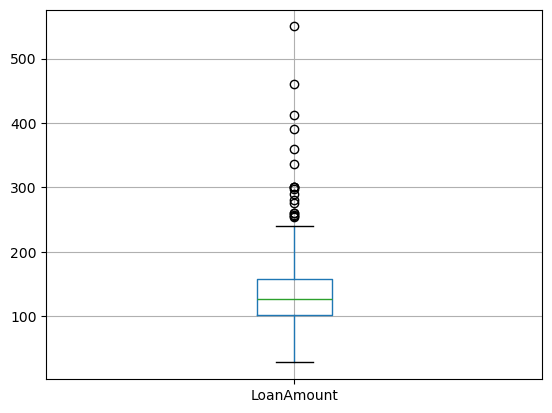

In [50]:
testdata.boxplot(column='LoanAmount')

In [51]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [52]:
testdata['TotalIncome'] = testdata['ApplicantIncome']+ testdata['CoapplicantIncome']
testdata['TotalIncome_log'] = np.log(testdata['TotalIncome'])

In [53]:
test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [54]:
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [55]:
test[:,7]=labelencoder_X.fit_transform(test[:,7])

In [56]:
test = ss.fit_transform(test)

In [57]:
pred=NBClassifier.predict(test)

In [58]:
pred


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
!kill $(lsof -t -i:8501)


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load the dataset
data = pd.read_csv("loan-train.csv")

# Drop Loan_ID column if it exists
if 'Loan_ID' in data.columns:
    data.drop(columns=['Loan_ID'], inplace=True)

# Handle missing values
for col in data.columns:
    if data[col].dtype == 'O':  # Categorical
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical
        data[col].fillna(data[col].mean(), inplace=True)

# Convert target variable (Loan_Status: 'Y' -> 1, 'N' -> 0)
data["Loan_Status"] = data["Loan_Status"].map({"Y": 1, "N": 0})

# Define features and target
X = data.drop(columns=["Loan_Status"])  # Features
y = data["Loan_Status"]  # Target

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
print("Categorical columns before encoding:", categorical_cols)

# Encode ALL categorical columns dynamically
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoder for later use in predictions

# Ensure all columns are numerical
print("Feature data types after encoding:\n", X.dtypes)
assert X.select_dtypes(include=["object"]).empty, "Some categorical columns were not encoded properly."

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model and encoders
with open("loan_model.pkl", "wb") as f:
    pickle.dump({"model": model, "encoders": label_encoders}, f)

print("Model trained and saved as loan_model.pkl")


Categorical columns before encoding: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')
Feature data types after encoding:
 Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object
Model trained and saved as loan_model.pkl


In [4]:
print("Features used for training:", list(X.columns))


Features used for training: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
